In [15]:
from operator import add
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import random
from random import shuffle
from random import randint

In [24]:
zeroPoints = [0,26.5,28.3,28.13,27.79,27.4,26.58]
FWHMeff = [0.8,0.92,0.87,0.83,0.80,0.78,0.76] # arcmins?
pixelScale = 0.2
readOut = 12.7
sigSys = 0.005
flareperiod = 4096
flarecycles = 10
dayinsec=86400
background = 40


In [3]:
# astro - sample lsst observations MJD
obs = [[59669.401036000003, 59669.415071000003, 59675.397819999998, 59677.415775000001, 59680.223431999999, 59680.237016999999, 59680.393256000003, 59683.295665999998, 59683.321671999998, 59683.323508000001, 59685.190992000003, 59685.194561999997, 59685.205355999999, 59685.296957999999, 59686.300793000002, 59686.318339999998, 59686.330581000002, 59686.345019, 59688.417806999998, 59691.311783999998, 59691.326623000001, 59697.201801000003, 59697.226375999999, 59704.123689, 59704.137447000001, 59713.211079000001, 59718.200410999998, 59718.224856000001, 59718.230648999997, 59718.252210999999, 59718.358633999997, 59718.37169, 59718.395214999997, 59718.407872000003, 59729.068837999999, 59729.093142999998, 59751.027583000003, 59751.049007000001, 59757.138006000001, 59769.953996999997, 59769.9594, 59769.965235000003, 59769.971061999997, 59777.082416999998, 59777.102072000001, 59786.070033999997, 59786.090433999998, 59786.097306000003, 59786.109027999999, 59791.009824000001, 59801.005361000003, 59801.073385999996, 59809.074531999999, 59809.086860000003, 59818.017253999999, 59830.021194000001, 60004.391853000001, 60010.366083000001, 60010.387742999999, 60013.374365000003, 60013.393918000002, 60023.375708, 60027.276451999998, 60028.288193, 60028.308090999999, 60030.314381999997, 60030.328269999998, 60036.217178999999, 60036.222633999998, 60036.230925000003, 60036.318089, 60036.346084999997, 60037.228949999997, 60037.233992000001, 60037.373957000003, 60037.394174000001, 60038.218720999997, 60040.209766, 60040.244417000002, 60042.223886, 60050.276508000003, 60050.298390000004, 60051.194966000003, 60055.180418999997, 60055.200091999999, 60057.197643, 60057.216825000003, 60063.178166999998, 60063.193485000003, 60066.164306999999, 60066.184649000003, 60070.175371999998, 60070.187576999997, 60077.210695000002, 60077.226862000003, 60080.142302, 60091.154763999999, 60091.176958999997, 60096.061420999999, 60096.078866999997, 60119.177481999999, 60119.194690999997, 60121.152529999999, 60121.172029000001, 60122.027545999998, 60122.043795999998, 60128.986486000002, 60129.092213999997, 60130.968904000001, 60131.001272000001, 60138.072592999997, 60138.089612999996, 60138.958729999998, 60138.970401999999, 60142.029265999998, 60142.043682000003, 60162.143162, 60162.163673000003, 60166.118167000001, 60166.127850999997, 60169.057130000001, 60179.031756999997, 60179.044825999998, 60184.074436000003, 60184.088114999999, 60196.034555999999, 60200.038926000001, 61114.360412000002, 61114.378301999997, 61115.286507999997, 61115.304865999999, 61116.299725999997, 61116.309694000003, 61117.308653, 61117.331833999997, 61121.261482000002, 61121.276405999997, 61122.247755999997, 61122.270722000001, 61125.246002, 61125.258173000002, 61146.195286000002, 61146.204263, 61152.169632999998, 61152.187408999998, 61152.196831000001, 61152.215136999999, 61154.158039000002, 61154.177694999998, 61155.167309999997, 61155.186038, 61160.155308000001, 61160.165632999997, 61162.202474999998, 61168.343100999999, 61168.360527999997, 61169.222824999997, 61169.234147000003, 61169.274084999997, 61169.299653000002, 61169.327989999998, 61169.348382999997, 61186.133314999999, 61186.148413000003, 61187.132354000001, 61187.145227000001, 61189.075984000003, 61194.299290000003, 61198.183609, 61198.202326999999, 61221.991934999998, 61222.002692000002, 61222.008972000003, 61222.212052000003, 61222.235246999997, 61223.976030999998, 61223.99267, 61225.270942000003, 61225.982183, 61225.997861000003, 61226.013913000003, 61226.033589999999, 61234.024741000001, 61242.011206000003, 61242.027925000002, 61250.978001000003, 61251.001197999998, 61263.049292000003, 61276.095731000001, 61276.999729000003, 61277.022233000003, 61281.07847, 61281.099573, 61306.024118000001, 61306.044666000002, 61308.049478000001, 61314.024559999998, 61314.040779000003, 61457.371571000003, 61458.338565999999, 61458.353643000002, 61458.370476999997, 61458.384679000003, 61461.378098000001, 61461.398512, 61468.329055000002, 61468.349443999999, 61472.339615999997, 61473.297693, 61475.314823000001, 61475.338272000001, 61477.293532000003, 61477.311663, 61480.271501000003, 61480.289167000003, 61482.353294, 61482.369771999998, 61485.302841999997, 61487.28716, 61498.254727, 61500.234777999998, 61501.223613000002, 61501.242009000001, 61501.258134000003, 61501.271148, 61510.195647, 61510.208694000001, 61510.295080000004, 61510.309720999998, 61512.192888999998, 61512.204087999999, 61514.185146000003, 61514.215648999998, 61515.222293999999, 61515.242032000002, 61522.286763999997, 61522.303873999997, 61522.314851000003, 61522.327489000003, 61522.334698999999, 61522.357401000001, 61523.159546000003, 61523.173132000004, 61524.316500000001, 61524.334358, 61526.143040000003, 61526.158313, 61529.144471, 61529.153075000002, 61535.190121, 61535.203748, 61541.125100999998, 61541.128262999999, 61542.128701000001, 61543.126642000003, 61551.275856, 61551.291928999999, 61553.077337000002, 61553.094985999996, 61553.233786999997, 61553.253231000002, 61553.257812999997, 61553.278839999999, 61576.204814999997, 61576.223758, 61579.021372000003, 61579.035147000002, 61579.178869000003, 61579.194248, 61581.984509000002, 61582.004709000001, 61582.009180000001, 61582.031156999998, 61582.102685999998, 61582.128579999997, 61584.982215000004, 61585.007533999997, 61587.991277000001, 61594.974951999997, 61594.993855000001, 61595.967822999999, 61607.968979999998, 61620.982320000003, 61624.978393999998, 61631.060151999998, 61812.369018999998, 61812.372172000003, 61813.38493, 61813.390756000001, 61818.385349999997, 61823.371563000001, 61825.345780000003, 61825.358432000001, 61831.360010999997, 61831.377608000003, 61836.370679, 61836.386992, 61837.319846999999, 61837.333532999997, 61840.293000999998, 61840.310907999999, 61842.402012999999, 61843.354002, 61843.367603999999, 61843.399298999997, 61849.298828999999, 61849.321584999998, 61849.366812, 61849.385729000001, 61850.270688999997, 61850.285108999997, 61850.311497000002, 61850.333305, 61850.390772999999, 61853.273294999999, 61853.294459999997, 61855.264411999997, 61855.281715999998, 61867.214832999998, 61867.227121000004, 61867.253166000002, 61867.272170999997, 61876.270036000002, 61876.289112999999, 61876.299217, 61876.310130999998, 61880.202315000002, 61880.220170000001, 61883.302288999999, 61884.188242999997, 61884.20768, 61888.161372000002, 61888.172133, 61888.177112999998, 61890.193804000002, 61890.219878000004, 61891.176502000002, 61891.190996999998, 61895.147465000002, 61895.148824999997, 61895.155115000001, 61896.128467000002, 61898.132425999996, 61898.156186, 61899.156008999998, 61908.186879000001, 61908.204249000002, 61909.111512000003, 61909.126201999999, 61909.139291, 61909.161033999997, 61911.101354999999, 61911.121593999997, 61919.065248999999, 61919.082111999996, 61925.105426000002, 61925.128547, 61926.150692000003, 61926.160682000002, 61927.124170000003, 61927.141666000003, 61944.009872000002, 61944.023482999997, 61975.970884000002, 61977.961220999998, 61990.022662000003, 61990.033308999999, 61990.969071, 61991.008371999997, 62014.081587000001, 62029.983668000001, 62049.995663000002, 62050.011637000003, 62053.996730999999, 62181.374238999997, 62182.367337999996, 62183.360256, 62186.365560999999, 62186.379598, 62192.316816999999, 62193.345355999998, 62194.342861999998, 62196.357411999998, 62198.347633999998, 62198.364235000001, 62198.385893999999, 62198.400805999998, 62200.310945999998, 62200.336392999998, 62200.343104, 62200.345803999997, 62204.338451000003, 62204.365867, 62205.292288999997, 62205.307386, 62205.321723000001, 62205.339640999999, 62208.323991999998, 62208.337879999999, 62209.288247999997, 62209.298486, 62212.274963000003, 62212.287948999998, 62213.285864999998, 62213.306700000001, 62219.256890999997, 62219.267795, 62223.241082, 62223.246038999998, 62226.338368999997, 62226.358560000001, 62227.325559999997, 62227.339432000001, 62228.239337999999, 62228.253972999999, 62235.210424999997, 62235.228042000002, 62236.20822, 62238.248929000001, 62238.268077000001, 62241.211341000002, 62241.218096999997, 62242.209183999999, 62242.219472999997, 62242.237584000002, 62242.253171999997, 62244.225061999998, 62244.237959999999, 62247.216048000002, 62247.231201000002, 62248.194274000001, 62248.204657000002, 62251.157003, 62252.166957000001, 62254.182165999999, 62254.187537999998, 62259.151827000002, 62259.167149000001, 62259.172633000002, 62259.183327999999, 62259.191350000001, 62259.204812000004, 62268.122880000003, 62268.129644000001, 62272.098738000001, 62272.110978999997, 62280.088317000002, 62280.107866999999, 62283.160799999998, 62286.131667000001, 62286.149421000002, 62286.206214999998, 62286.223382999997, 62306.062433999999, 62306.081048, 62306.085662999998, 62306.108797000001, 62310.012877000001, 62314.054224, 62323.028632000001, 62323.048261000004, 62323.988273000003, 62324.003357000001, 62324.955743999999, 62345.012896, 62350.057391000002, 62350.075546, 62350.996397000003, 62351.013322999999, 62354.984272000002, 62355.989008999997, 62362.084443, 62362.111626999998, 62370.008264999997, 62370.026551000003, 62391.000625000001, 62391.017884000001, 62399.080485999999, 62547.357983000002, 62548.355286999998, 62549.347605000003, 62549.374601000003, 62549.380873000002, 62550.391247, 62552.342559999997, 62552.35871, 62553.376311, 62553.392919999998, 62555.367782000001, 62562.328599, 62563.314242, 62563.325872000001, 62564.311908000003, 62564.332610999998, 62565.378089999998, 62566.307476000002, 62572.319470000002, 62572.334019000002, 62579.283603999997, 62579.289083999996, 62579.304375, 62583.363942999997, 62583.386175, 62593.229937999997, 62594.234393999999, 62596.220564000003, 62596.235083, 62597.221890000001, 62597.240213999998, 62598.244789999997, 62598.271589000004, 62601.215307999999, 62601.230505, 62606.214210999999, 62606.232379000001, 62607.183992999999, 62607.205892999998, 62608.188769, 62608.208103999998, 62609.193136000002, 62609.212382999998, 62614.276168999997, 62614.289700000001, 62614.40524, 62615.192768000001, 62615.214276999999, 62615.237509999999, 62615.261590000002, 62617.184884000002, 62617.201126, 62619.158406000002, 62619.172734, 62625.132279999998, 62625.149214999998, 62628.238909, 62628.262873, 62630.116813000001, 62637.198951999999, 62637.217517999998, 62644.126301999997, 62644.138222000001, 62645.104292999997, 62645.127547999997, 62651.088185000001, 62651.102419000003, 62655.180737000002, 62655.203766999999, 62655.215711999997, 62655.230992999997, 62678.069217999997, 62678.085948, 62678.108873999998, 62678.125568000003, 62679.019597999999, 62679.035258000004, 62680.994428999998, 62680.998517, 62682.975467999997, 62682.993563999997, 62699.015419000003, 62699.028081999997, 62702.961589999999, 62702.975097000002, 62710.021248999998, 62725.122134999998, 62739.000661999999, 62739.020772999997, 62746.071468000002, 62746.091383999999, 62767.044696999998, 62767.057416000003, 62786.989026000003, 62787.012288999998, 62907.389675999999, 62910.355684000002, 62917.357602999997, 62918.341564000002, 62918.361992999999, 62921.334889999998, 62921.355549, 62924.371144999997, 62926.395677, 62929.382726000003, 62931.294734000003, 62931.341457000002, 62933.296303000003, 62933.305694000002, 62933.312453999999, 62935.301229999997, 62935.324794, 62936.334968000003, 62936.361724000002, 62942.289886999999, 62942.307116000004, 62945.286585000002, 62945.302958, 62946.261257999999, 62946.279375999999, 62948.267722999997, 62948.283458999998, 62950.266599000002, 62952.263092000001, 62961.223678000002, 62961.229058999998, 62961.231755000001, 62963.212475, 62963.217839999998, 62964.286281000001, 62964.306131999998, 62970.216094000003, 62970.229289000003, 62970.237544000003, 62970.254657999998, 62970.278386999998, 62970.295687999998, 62971.200882999998, 62971.221944999998, 62974.193093000002, 62974.212836999999, 62975.191464000003, 62975.207611999998, 62978.173988000002, 62978.184294999999, 62982.161947000001, 62982.177073999999, 62984.183287, 62984.201694000003, 62988.166173999998, 62988.182500000003, 62990.144530999998, 62990.154106000002, 63008.082414999997, 63008.096201, 63013.110240000002, 63013.130654000001, 63019.096136, 63020.122412999997, 63021.055490999999, 63033.026432999999, 63033.030551000003, 63043.991292999999, 63044.008430000002, 63047.046110000003, 63047.063009999998, 63051.185763000001, 63052.153337000003, 63052.174461000002, 63067.027063000001, 63067.049218, 63075.972807999999, 63079.058826, 63081.140289000003, 63081.159926, 63083.087984999998, 63083.115440000001, 63093.993697999998, 63108.068511999998, 63113.043817999998, 63117.002920999999, 63117.024508000002, 63123.996573999997], [59757.138006000001, 59791.009824000001, 59818.017253999999, 60027.276451999998, 60051.194966000003, 60080.142302, 60169.057130000001, 60200.038926000001, 61116.299725999997, 61116.309694000003, 61146.195286000002, 61146.204263, 61234.024741000001, 61263.049292000003, 61472.339615999997, 61473.297693, 61498.254727, 61500.234777999998, 61529.144471, 61529.153075000002, 61587.991277000001, 61823.371563000001, 61883.302288999999, 61888.161372000002, 61888.172133, 61888.177112999998, 62181.374238999997, 62183.360256, 62236.20822, 62241.211341000002, 62241.218096999997, 62268.122880000003, 62268.129644000001, 62355.989008999997, 62562.328599, 62566.307476000002, 62593.229937999997, 62594.234393999999, 62680.994428999998, 62680.998517, 62710.021248999998, 62917.357602999997, 62950.266599000002, 62952.263092000001, 63033.026432999999, 63033.030551000003, 63093.993697999998], [59697.201801000003, 59697.226375999999, 59751.027583000003, 59751.049007000001, 60050.276508000003, 60050.298390000004, 60077.210695000002, 60077.226862000003, 60142.029265999998, 60142.043682000003, 60196.034555999999, 61223.976030999998, 61223.99267, 61225.982183, 61225.997861000003, 61226.013913000003, 61226.033589999999, 61314.024559999998, 61314.040779000003, 61501.223613000002, 61501.242009000001, 61501.258134000003, 61501.271148, 61535.190121, 61535.203748, 61553.077337000002, 61553.094985999996, 61825.345780000003, 61825.358432000001, 61855.264411999997, 61855.281715999998, 61880.202315000002, 61880.220170000001, 61884.188242999997, 61884.20768, 61919.065248999999, 61919.082111999996, 62208.323991999998, 62208.337879999999, 62209.288247999997, 62209.298486, 62235.210424999997, 62235.228042000002, 62272.098738000001, 62272.110978999997, 62362.084443, 62362.111626999998, 62564.311908000003, 62564.332610999998, 62596.220564000003, 62596.235083, 62597.221890000001, 62597.240213999998, 62625.132279999998, 62625.149214999998, 62739.000661999999, 62739.020772999997, 62948.267722999997, 62948.283458999998, 62974.193093000002, 62974.212836999999, 62975.191464000003, 62975.207611999998, 63117.002920999999, 63117.024508000002], [59675.397819999998, 59704.123689, 59704.137447000001, 59729.068837999999, 59729.093142999998, 59786.070033999997, 59786.090433999998, 59786.097306000003, 59786.109027999999, 60023.375708, 60028.288193, 60028.308090999999, 60030.314381999997, 60030.328269999998, 60055.180418999997, 60055.200091999999, 60119.177481999999, 60119.194690999997, 60121.152529999999, 60121.172029000001, 60122.027545999998, 60122.043795999998, 60162.143162, 60162.163673000003, 61114.360412000002, 61114.378301999997, 61115.286507999997, 61115.304865999999, 61121.261482000002, 61121.276405999997, 61125.246002, 61125.258173000002, 61169.222824999997, 61169.234147000003, 61169.274084999997, 61169.299653000002, 61169.327989999998, 61169.348382999997, 61198.183609, 61198.202326999999, 61242.011206000003, 61242.027925000002, 61475.314823000001, 61475.338272000001, 61477.293532000003, 61477.311663, 61480.271501000003, 61480.289167000003, 61524.316500000001, 61524.334358, 61553.233786999997, 61553.253231000002, 61553.257812999997, 61553.278839999999, 61579.021372000003, 61579.035147000002, 61581.984509000002, 61582.004709000001, 61582.009180000001, 61582.031156999998, 61582.102685999998, 61582.128579999997, 61584.982215000004, 61585.007533999997, 61831.360010999997, 61831.377608000003, 61837.319846999999, 61837.333532999997, 61849.298828999999, 61849.321584999998, 61849.366812, 61849.385729000001, 61853.273294999999, 61853.294459999997, 61891.176502000002, 61891.190996999998, 61908.186879000001, 61908.204249000002, 61909.111512000003, 61909.126201999999, 61909.139291, 61909.161033999997, 62182.367337999996, 62186.365560999999, 62186.379598, 62204.338451000003, 62204.365867, 62213.285864999998, 62213.306700000001, 62242.209183999999, 62242.219472999997, 62242.237584000002, 62242.253171999997, 62244.225061999998, 62244.237959999999, 62247.216048000002, 62247.231201000002, 62306.062433999999, 62306.081048, 62306.085662999998, 62306.108797000001, 62323.988273000003, 62324.003357000001, 62345.012896, 62350.996397000003, 62351.013322999999, 62547.357983000002, 62563.314242, 62563.325872000001, 62565.378089999998, 62598.244789999997, 62598.271589000004, 62601.215307999999, 62601.230505, 62615.192768000001, 62615.214276999999, 62615.237509999999, 62615.261590000002, 62619.158406000002, 62619.172734, 62644.126301999997, 62644.138222000001, 62645.104292999997, 62645.127547999997, 62651.088185000001, 62651.102419000003, 62679.019597999999, 62679.035258000004, 62767.044696999998, 62767.057416000003, 62918.341564000002, 62918.361992999999, 62942.289886999999, 62942.307116000004, 62970.216094000003, 62970.229289000003, 62970.237544000003, 62970.254657999998, 62970.278386999998, 62970.295687999998, 62971.200882999998, 62971.221944999998, 63013.110240000002, 63013.130654000001, 63043.991292999999, 63044.008430000002, 63113.043817999998], [59680.223431999999, 59680.237016999999, 59680.393256000003, 59691.311783999998, 59691.326623000001, 59777.082416999998, 59777.102072000001, 59809.074531999999, 59809.086860000003, 60036.318089, 60036.346084999997, 60037.373957000003, 60037.394174000001, 60057.197643, 60057.216825000003, 60063.178166999998, 60063.193485000003, 60091.154763999999, 60091.176958999997, 60138.072592999997, 60138.089612999996, 60166.118167000001, 60166.127850999997, 60179.031756999997, 60179.044825999998, 61117.308653, 61117.331833999997, 61122.247755999997, 61122.270722000001, 61152.169632999998, 61152.187408999998, 61152.196831000001, 61152.215136999999, 61154.158039000002, 61154.177694999998, 61155.167309999997, 61155.186038, 61168.343100999999, 61168.360527999997, 61225.270942000003, 61468.329055000002, 61468.349443999999, 61482.353294, 61482.369771999998, 61510.195647, 61510.208694000001, 61510.295080000004, 61510.309720999998, 61522.286763999997, 61522.303873999997, 61522.314851000003, 61522.327489000003, 61522.334698999999, 61522.357401000001, 61523.159546000003, 61523.173132000004, 61526.143040000003, 61526.158313, 61551.275856, 61551.291928999999, 61579.178869000003, 61579.194248, 61836.370679, 61836.386992, 61850.270688999997, 61850.285108999997, 61850.311497000002, 61850.333305, 61850.390772999999, 61876.270036000002, 61876.289112999999, 61876.299217, 61876.310130999998, 61890.193804000002, 61890.219878000004, 61911.101354999999, 61911.121593999997, 61944.009872000002, 61944.023482999997, 61990.022662000003, 61990.033308999999, 62205.292288999997, 62205.307386, 62205.321723000001, 62205.339640999999, 62212.274963000003, 62212.287948999998, 62219.256890999997, 62219.267795, 62238.248929000001, 62238.268077000001, 62248.194274000001, 62248.204657000002, 62259.151827000002, 62259.167149000001, 62259.172633000002, 62259.183327999999, 62259.191350000001, 62259.204812000004, 62323.028632000001, 62323.048261000004, 62350.057391000002, 62350.075546, 62391.000625000001, 62391.017884000001, 62572.319470000002, 62572.334019000002, 62614.276168999997, 62614.289700000001, 62614.40524, 62617.184884000002, 62617.201126, 62628.238909, 62628.262873, 62655.180737000002, 62655.203766999999, 62655.215711999997, 62655.230992999997, 62678.069217999997, 62678.085948, 62678.108873999998, 62678.125568000003, 62682.975467999997, 62682.993563999997, 62746.071468000002, 62746.091383999999, 62921.334889999998, 62921.355549, 62924.371144999997, 62929.382726000003, 62945.286585000002, 62945.302958, 62946.261257999999, 62946.279375999999, 62978.173988000002, 62978.184294999999, 62982.161947000001, 62982.177073999999, 62984.183287, 62984.201694000003, 63008.082414999997, 63008.096201, 63067.027063000001, 63067.049218, 63083.087984999998, 63083.115440000001], [59669.401036000003, 59669.415071000003, 59677.415775000001, 59686.300793000002, 59686.318339999998, 59686.330581000002, 59686.345019, 59688.417806999998, 59718.200410999998, 59718.224856000001, 59718.230648999997, 59718.252210999999, 59718.358633999997, 59718.37169, 59718.395214999997, 59718.407872000003, 60004.391853000001, 60010.366083000001, 60010.387742999999, 60013.374365000003, 60013.393918000002, 60066.164306999999, 60066.184649000003, 60096.061420999999, 60096.078866999997, 60130.968904000001, 60131.001272000001, 60138.958729999998, 60138.970401999999, 60184.074436000003, 60184.088114999999, 61186.133314999999, 61186.148413000003, 61187.132354000001, 61187.145227000001, 61189.075984000003, 61222.212052000003, 61222.235246999997, 61250.978001000003, 61251.001197999998, 61281.07847, 61281.099573, 61306.024118000001, 61306.044666000002, 61458.338565999999, 61458.353643000002, 61458.370476999997, 61458.384679000003, 61461.378098000001, 61461.398512, 61515.222293999999, 61515.242032000002, 61576.204814999997, 61576.223758, 61594.974951999997, 61594.993855000001, 61818.385349999997, 61842.402012999999, 61843.354002, 61843.367603999999, 61843.399298999997, 61867.214832999998, 61867.227121000004, 61867.253166000002, 61867.272170999997, 61925.105426000002, 61925.128547, 61926.150692000003, 61926.160682000002, 61927.124170000003, 61927.141666000003, 61990.969071, 61991.008371999997, 62049.995663000002, 62050.011637000003, 62053.996730999999, 62198.347633999998, 62198.364235000001, 62198.385893999999, 62198.400805999998, 62226.338368999997, 62226.358560000001, 62227.325559999997, 62227.339432000001, 62228.239337999999, 62228.253972999999, 62280.088317000002, 62280.107866999999, 62286.131667000001, 62286.149421000002, 62286.206214999998, 62286.223382999997, 62324.955743999999, 62370.008264999997, 62370.026551000003, 62399.080485999999, 62550.391247, 62553.376311, 62553.392919999998, 62583.363942999997, 62583.386175, 62606.214210999999, 62606.232379000001, 62630.116813000001, 62637.198951999999, 62637.217517999998, 62699.015419000003, 62699.028081999997, 62702.961589999999, 62702.975097000002, 62786.989026000003, 62787.012288999998, 62926.395677, 62935.301229999997, 62935.324794, 62936.334968000003, 62936.361724000002, 62964.286281000001, 62964.306131999998, 62988.166173999998, 62988.182500000003, 62990.144530999998, 62990.154106000002, 63047.046110000003, 63047.063009999998, 63052.153337000003, 63052.174461000002, 63081.140289000003, 63081.159926, 63123.996573999997], [59683.295665999998, 59683.321671999998, 59683.323508000001, 59685.190992000003, 59685.194561999997, 59685.205355999999, 59685.296957999999, 59713.211079000001, 59769.953996999997, 59769.9594, 59769.965235000003, 59769.971061999997, 59801.005361000003, 59801.073385999996, 59830.021194000001, 60036.217178999999, 60036.222633999998, 60036.230925000003, 60037.228949999997, 60037.233992000001, 60038.218720999997, 60040.209766, 60040.244417000002, 60042.223886, 60070.175371999998, 60070.187576999997, 60128.986486000002, 60129.092213999997, 61160.155308000001, 61160.165632999997, 61162.202474999998, 61194.299290000003, 61221.991934999998, 61222.002692000002, 61222.008972000003, 61276.095731000001, 61276.999729000003, 61277.022233000003, 61308.049478000001, 61457.371571000003, 61485.302841999997, 61487.28716, 61512.192888999998, 61512.204087999999, 61514.185146000003, 61514.215648999998, 61541.125100999998, 61541.128262999999, 61542.128701000001, 61543.126642000003, 61595.967822999999, 61607.968979999998, 61620.982320000003, 61624.978393999998, 61631.060151999998, 61812.369018999998, 61812.372172000003, 61813.38493, 61813.390756000001, 61840.293000999998, 61840.310907999999, 61895.147465000002, 61895.148824999997, 61895.155115000001, 61896.128467000002, 61898.132425999996, 61898.156186, 61899.156008999998, 61975.970884000002, 61977.961220999998, 62014.081587000001, 62029.983668000001, 62192.316816999999, 62193.345355999998, 62194.342861999998, 62196.357411999998, 62200.310945999998, 62200.336392999998, 62200.343104, 62200.345803999997, 62223.241082, 62223.246038999998, 62251.157003, 62252.166957000001, 62254.182165999999, 62254.187537999998, 62283.160799999998, 62310.012877000001, 62314.054224, 62354.984272000002, 62548.355286999998, 62549.347605000003, 62549.374601000003, 62549.380873000002, 62552.342559999997, 62552.35871, 62555.367782000001, 62579.283603999997, 62579.289083999996, 62579.304375, 62607.183992999999, 62607.205892999998, 62608.188769, 62608.208103999998, 62609.193136000002, 62609.212382999998, 62725.122134999998, 62907.389675999999, 62910.355684000002, 62931.294734000003, 62931.341457000002, 62933.296303000003, 62933.305694000002, 62933.312453999999, 62961.223678000002, 62961.229058999998, 62961.231755000001, 62963.212475, 62963.217839999998, 63019.096136, 63020.122412999997, 63021.055490999999, 63051.185763000001, 63075.972807999999, 63079.058826, 63108.068511999998]]

In [4]:
def magUncertainy(Filter, objectmag, exposuretime,background, FWHM): # b is background counts per pixel   
    countsPS = 10**((Filter-objectmag)/2.5)
    counts = countsPS * exposuretime
    uncertainty = 1/(counts/((counts/2.3)+(((background/2.3)+(12.7**2))*2.266*((FWHM/0.2)**2)))**0.5) # gain assumed to be 1
    return uncertainty

In [5]:
def averageFlux(observations, Frequency, exptime):
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    return c

def Flux(observations,Frequency,exptime):
    a = [np.sin((2*np.pi*(Frequency)*x)) for x in observations]
    return a

In [6]:
def ellipsoidalFlux(observations, Frequency,exptime):
    period = 1/(Frequency)
    phase = [(x % (2*period)) for x in observations]
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    
    for x in range(0,len(phase)):
        if (phase[x]+(1.5*period)) < (3*period):
            c[x] = c[x]*(1./3.)
        else:
            c[x] = c[x]*(2./3.)
    return c

In [20]:
def flaring(B, length, dayinsec=86400,amplitude=1):   
    fouriers = np.linspace(0.00001,0.05, int(dayinsec/30))
    logF = [np.log(x) for x in fouriers] # start at 30 go to a day in 30 sec increments
    real = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers] #random.gauss(mu,sigma) to change for values from zurita
    # imaginary = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers]
    IFT = np.fft.ifft(real)
    seconds = np.linspace(0,dayinsec, int(dayinsec/30.)) # the day in 30 sec increments
    minutes = [x for x in seconds]
    minimum = (np.max(-IFT))
    positive = [x + minimum for x in IFT] # what did this even achieve? it helped with normalisation!
    normalised = [x/(np.mean(positive)) for x in positive] # find normalisation
    normalisedmin = minimum/(np.mean(positive))
    normalised = [x - normalisedmin for x in normalised]
    flareMag = [amplitude * x for x in normalised] # normalise to amplitude
    logmins = [np.log(d) for d in minutes] # for plotting?
#     plt.plot(minutes,flareMag)
#     plt.title('lightcurve')
#     plt.show()
    return flareMag

In [23]:
def createLightCurve(frequencyRange,objectmag=20,modulationAmplitude=0.1): # frequency range and object mag in list
    
    filterletter = ['o','u','g','r','i','z','y']
    allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy = [], [], [], [], [], [], [] #reset
    y = [allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy] # for looping only
    for z in range(1, len(y)):
        y[z] = ellipsoidalFlux(obs[z], frequencyRange,30)
        y[z] = [modulationAmplitude * t for t in y[z]] # scaling
        for G in range(0, len(y[z])):
            flareMinute = int(round((obs[z][G]*24*60*2)%((dayinsec/(30*2))*flarecycles)))
            y[z][G] = y[z][G] + longflare[flareMinute] # add flares swapped to second but not changing the name intrtoduces fewer bugs
    date = []
    amplitude = []
    mag = []
    error = []
    filts = []
    for z in range(1, len(y)):
        #date.extend([x for x in obs[z]])
        date.extend(obs[z])
        amplitude = [t + random.gauss(0,magUncertainy(zeroPoints[z],objectmag,30,background,FWHMeff[z])) for t in y[z]] # scale amplitude and add poisson noise
        mag.extend([objectmag - t for t in amplitude]) # add actual mag
        error.extend([sigSys + magUncertainy(zeroPoints[z],objectmag,30,background,FWHMeff[z])+0.2]*len(amplitude))
        filts.extend([filterletter[z]]*len(amplitude))
    


    return date, mag, error, filts

In [21]:
longflare = []
for floop in range(flarecycles):
    flareone = flaring(-1, flareperiod, amplitude=0.3)
    flareone = flareone[0:1440]
    positiveflare = [abs(x) for x in flareone]
    longflare.extend(positiveflare)

/tmp/ipykernel_12803/3179693455.py:16: RuntimeWarning: divide by zero encountered in log
  logmins = [np.log(d) for d in minutes] # for plotting?


In [27]:
# maglength = 7
# MagRangearray = np.linspace(17,24,maglength)
# MagRange = [x for x in MagRangearray]

freqlength = 7
PrangeLoop = np.logspace(-2.5,2,freqlength)
FrangeLoop = [(1/x) for x in PrangeLoop]

In [32]:
base_mag = 20
base_period = PrangeLoop[0]

In [38]:
PrangeLoop[-1]

100.0

In [ ]:
results = []
for mag in MagRange:
    results.append(createLightCurve(FrangeLoop,objectmag=magRange[mag]))

In [33]:
results = createLightCurve(base_period,objectmag=base_mag)

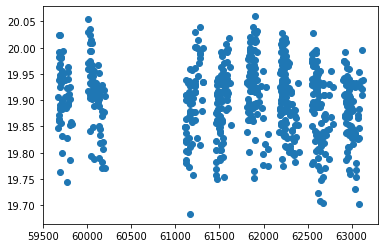

In [36]:
plt.plot(results[0],results[1],'o')